In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from abc import ABC,abstractmethod

In [64]:
df = pd.read_csv("/content/Airbnb_Open_Data.csv")

<ipython-input-64-33e45a96c0cf>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Airbnb_Open_Data.csv")


In [65]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [67]:
df.isna().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [68]:
df=df.drop(['id','NAME','host id','host name','lat','long','country code','last review','reviews per month','country','calculated host listings count','house_rules','license'],axis=1)

In [69]:
df.isna().sum()

,0
host_identity_verified,289
neighbourhood group,29
neighbourhood,16
instant_bookable,105
cancellation_policy,76
room type,0
Construction year,214
price,247
service fee,273
minimum nights,409


In [70]:
df

,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,availability 365
0,unconfirmed,Brooklyn,Kensington,False,strict,Private room,2020.0,$966,$193,10.0,9.0,4.0,286.0
1,verified,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,4.0,228.0
2,NaN,Manhattan,Harlem,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,5.0,352.0
3,unconfirmed,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.0,322.0
4,verified,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,3.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,verified,Brooklyn,Williamsburg,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,3.0,227.0
102595,unconfirmed,Manhattan,Morningside Heights,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,2.0,395.0
102596,unconfirmed,Brooklyn,Park Slope,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,5.0,342.0
102597,unconfirmed,Queens,Long Island City,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,3.0,386.0


In [71]:
to_clean = ['price','service fee']
for clmn in to_clean:
  df[clmn] = df[clmn].str.replace('$','',regex=False)
  df[clmn] = df[clmn].str.replace(',','',regex=False)
  df[clmn] = df[clmn].astype(float)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   host_identity_verified  102310 non-null  object 
 1   neighbourhood group     102570 non-null  object 
 2   neighbourhood           102583 non-null  object 
 3   instant_bookable        102494 non-null  object 
 4   cancellation_policy     102523 non-null  object 
 5   room type               102599 non-null  object 
 6   Construction year       102385 non-null  float64
 7   price                   102352 non-null  float64
 8   service fee             102326 non-null  float64
 9   minimum nights          102190 non-null  float64
 10  number of reviews       102416 non-null  float64
 11  review rate number      102273 non-null  float64
 12  availability 365        102151 non-null  float64
dtypes: float64(7), object(6)
memory usage: 10.2+ MB


In [73]:
df['price'].fillna(df['price'].mean(),inplace=True)
df['service fee'].fillna(df['service fee'].mean(),inplace=True)

<ipython-input-73-df7e7aafc3fa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(),inplace=True)
<ipython-input-73-df7e7aafc3fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [74]:
df['host_identity_verified'].isnull().sum()

289

In [75]:
not_change = ["price","service fee"]
change = [col for col in df.columns if col not in not_change]
for col in change:
  df[col].fillna(df[col].mode()[0],inplace=True)

<ipython-input-75-4674c8dd20ea>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)
<ipython-input-75-4674c8dd20ea>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0],inplace=True)


In [76]:
df['host_identity_verified'].isnull().sum()

0

In [77]:
df.drop_duplicates(inplace=True)

In [91]:
df.isnull().sum()

,0
host_identity_verified,0
neighbourhood group,0
neighbourhood,0
instant_bookable,0
cancellation_policy,0
room type,0
Construction year,0
price,0
service fee,0
minimum nights,0


Text(0, 0.5, 'Frequency')

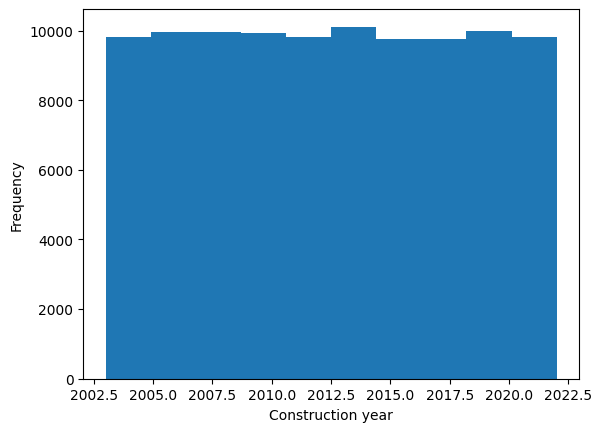

In [120]:
df['Construction year'].plot(kind="hist")
plt.xlabel("Construction year")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

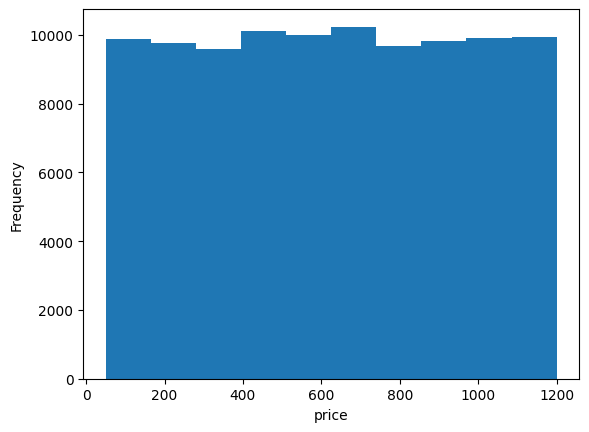

In [119]:
df['price'].plot(kind='hist')
plt.xlabel("price")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

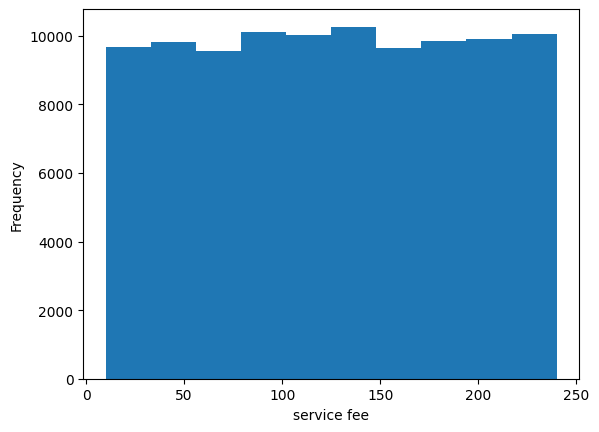

In [118]:
df['service fee'].plot(kind='hist')
plt.xlabel("service fee")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

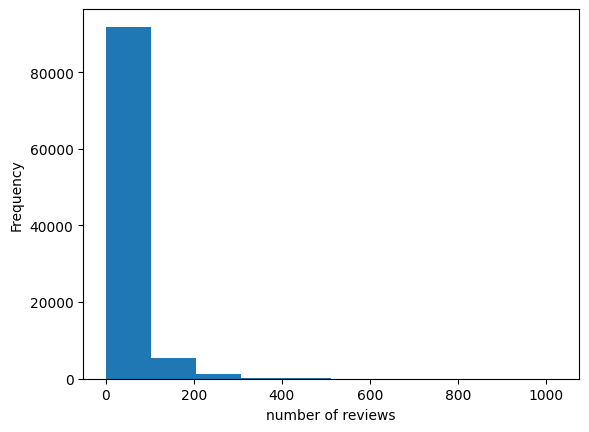

In [117]:
df['number of reviews'].plot(kind='hist')
plt.xlabel("number of reviews")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

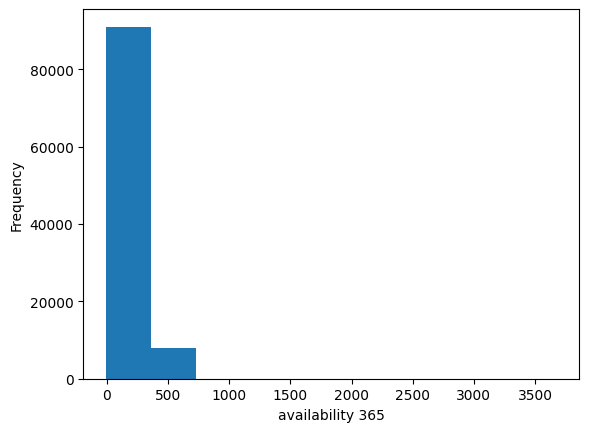

In [116]:
df['availability 365'].plot(kind='hist')
plt.xlabel("availability 365")
plt.ylabel("Frequency")

<Axes: ylabel='price'>

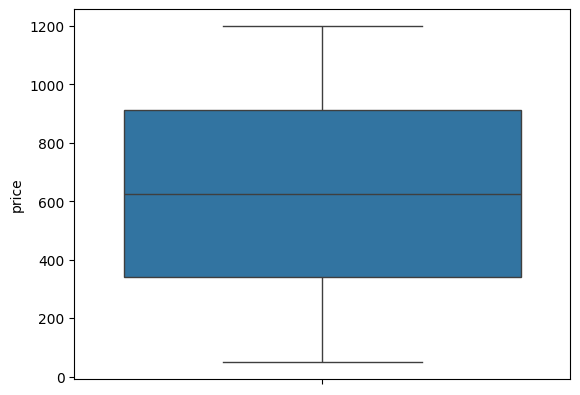

In [102]:
sns.boxplot(data=df['price'])

<Axes: ylabel='service fee'>

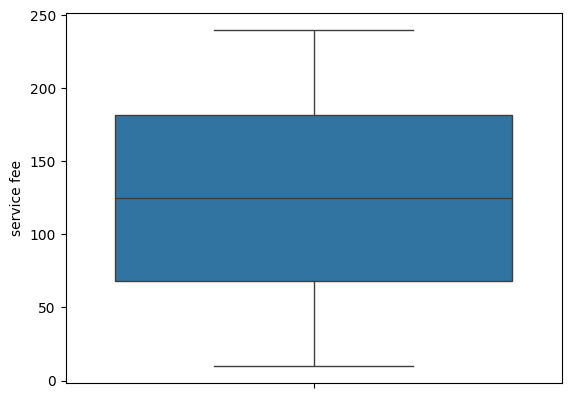

In [103]:
sns.boxplot(data=df['service fee'])

<Axes: ylabel='minimum nights'>

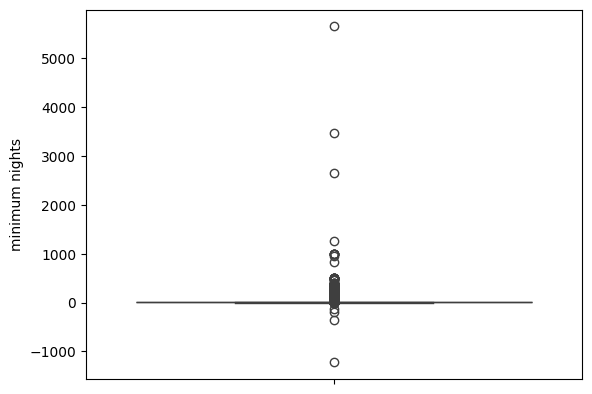

In [104]:
sns.boxplot(data=df['minimum nights'])

<Axes: xlabel='service fee', ylabel='minimum nights'>

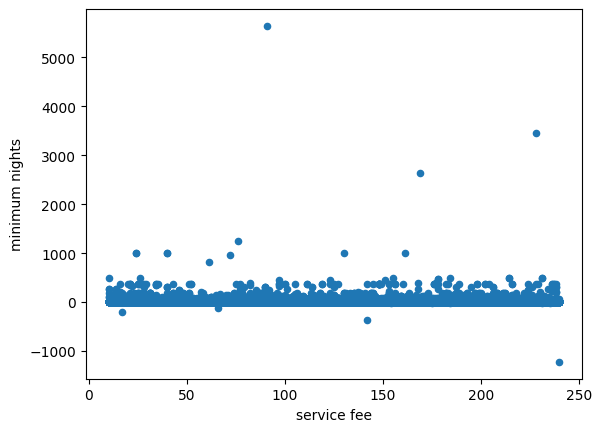

In [115]:
df.plot(kind='scatter', x='service fee', y='minimum nights')

<Axes: title={'center': 'minimum nights'}>

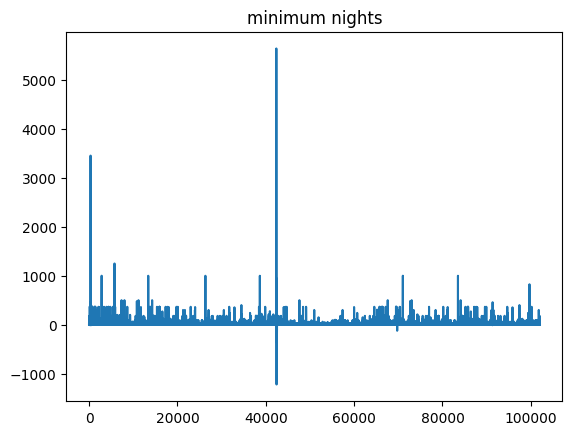

In [114]:
df['minimum nights'].plot(kind='line',title='minimum nights')

In [128]:
class DataBase(ABC):
  @abstractmethod
  def add_new_string(self):
    pass
  @abstractmethod
  def remove_string(self):
    pass
  @abstractmethod
  def change_values(self):
    pass
  @abstractmethod
  def read(self):
    pass
  @abstractmethod
  def save(self):
    pass

In [ ]:
class HotelDB(DataBase):
  def __init__(self):
    self.df = pd.DataFrame()
  def read(self,path):
    try:
      self.df = pd.read_csv(path)
      return f"File {path} was successfully read"
    except:
      return f"No exist file on path - {path} or path is invalid"
  def save(self,filename):
    df.to_csv(filename)
  def add_new_string(self,row):
    try:
      key = self.df.columns.to_list()
      row1 = pd.Series(row,index=key)
      self.df = pd.concat([df,row1.to_frame().T],ignore_index=True)
      return f"Successfully added new string"
    except Exception as e:
      return f"Sorry, but {e} please check your string"
  def remove_string(self,index):
    try:
      df.drop(index,inplace=True)
      return f"Successfully removed string with index {index}"
    except:
      return f"No match index {index}"
  def change_values(self,num_str,num_bin,value):
    try:
      df.iloc[num_str,num_bin] = value
    except Exception as e:
      return f"Sorry {e} check your indexes"